# MEDIAN ABSOLUTE DEVIATION





In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

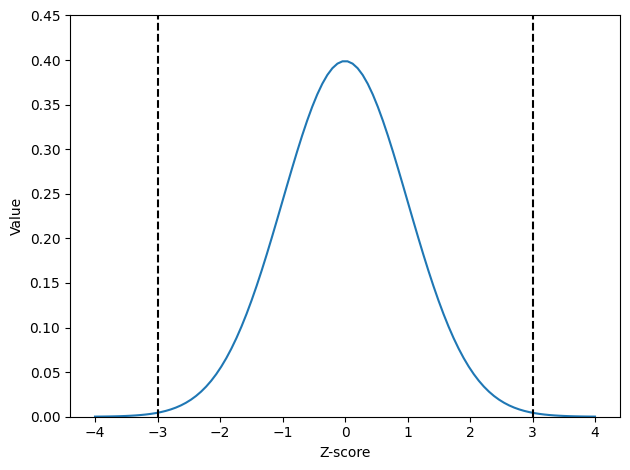

In [ ]:
import scipy.stats as stats
import math

mu = 0
variance = 1

sigma = math.sqrt(variance)

x = np.linspace(mu-4*sigma, mu+4*sigma, 100)

fig, ax = plt.subplots()

ax.plot(x, stats.norm.pdf(x, mu, sigma))

ax.axvline(mu-3*sigma, 0, 1, ls='--', c='black')
ax.axvline(mu+3*sigma, 0, 1, ls='--', c='black')
ax.set_ylim(0, 0.45)
ax.set_ylabel('Value')
ax.set_xlabel('Z-score')

plt.grid(False)
plt.tight_layout()

In [ ]:
df = pd.read_csv('/content/sample_data/ec2_cpu_utilization_53ea38.csv')
df.head()

,timestamp,value
0,2014-02-14 14:30:00,1.732
1,2014-02-14 14:35:00,1.732
2,2014-02-14 14:40:00,1.960
3,2014-02-14 14:45:00,1.732
4,2014-02-14 14:50:00,1.706


In [ ]:
anomalies_timestamp = [
        "2014-02-15 10:55:00",
        "2014-02-22 04:10:00"
    ]
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df['is_anomaly'] = 1

for each in anomalies_timestamp:
    df.loc[df['timestamp'] == each, 'is_anomaly'] = -1

df.head()

,timestamp,value,is_anomaly
0,2014-02-14 14:30:00,1.732,1
1,2014-02-14 14:35:00,1.732,1
2,2014-02-14 14:40:00,1.960,1
3,2014-02-14 14:45:00,1.732,1
4,2014-02-14 14:50:00,1.706,1


In [ ]:
anomaly_df = df.loc[df['is_anomaly'] == -1]
inlier_df = df.loc[df['is_anomaly'] == 1]

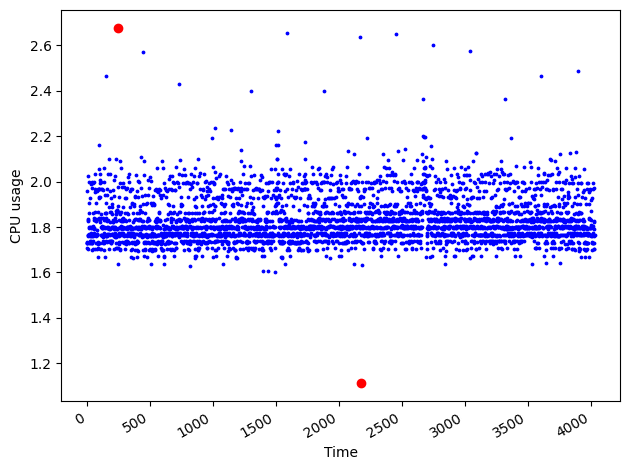

In [ ]:
fig, ax = plt.subplots()

ax.scatter(inlier_df.index, inlier_df['value'], color='blue', s=3, label='Inlier')
ax.scatter(anomaly_df.index, anomaly_df['value'], color='red', label='Anomaly')
ax.set_xlabel('Time')
ax.set_ylabel('CPU usage')
#ax.legend(loc=2)

plt.grid(False)
fig.autofmt_xdate()
plt.tight_layout()

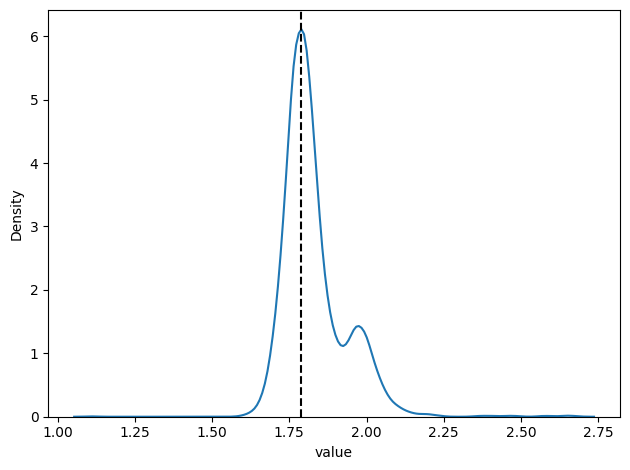

In [ ]:
import seaborn as sns

sns.kdeplot(df['value']);
plt.grid(False)
plt.axvline(1.789, 0, 1, c='black', ls='--')
plt.tight_layout()

In [ ]:
from scipy.stats import median_abs_deviation

mad = median_abs_deviation(df['value'])
median = np.median(df['value'])

print(median)
print(mad)

def compute_robust_z_score(x):
    return .6745*(x-median)/mad

1.8
0.03600000000000003


In [ ]:
df['z-score'] = df['value'].apply(compute_robust_z_score)

In [ ]:
df.head()

,timestamp,value,is_anomaly,z-score
0,2014-02-14 14:30:00,1.732,1,-1.274056
1,2014-02-14 14:35:00,1.732,1,-1.274056
2,2014-02-14 14:40:00,1.960,1,2.997778
3,2014-02-14 14:45:00,1.732,1,-1.274056
4,2014-02-14 14:50:00,1.706,1,-1.761194


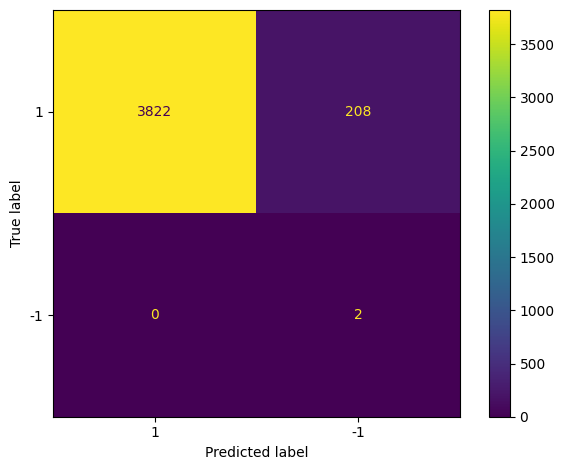

In [ ]:
df['baseline'] = 1
df.loc[df['z-score'] >= 4.0, 'baseline'] = -1
df.loc[df['z-score'] <=-4.0, 'baseline'] = -1
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(df['is_anomaly'], df['baseline'], labels=[1, -1])

disp_cm = ConfusionMatrixDisplay(cm, display_labels=[1, -1])

disp_cm.plot();

plt.grid(False)
plt.tight_layout()

# Anomalie Detection using Arima modeling

using shampoo_sales data

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales, dtype: float64


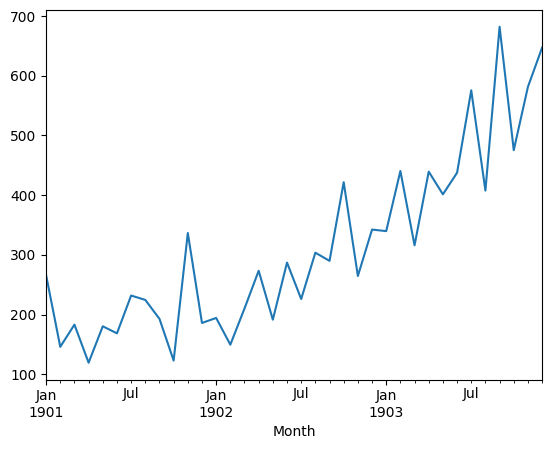

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('/content/sample_data/shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

<ipython-input-3-3d79bdea9f84>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-3-3d79bdea9f84>:9: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/sample_data/shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)


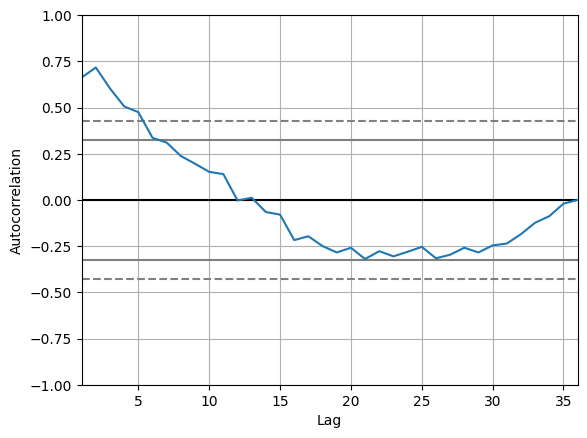

In [ ]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series = read_csv('/content/sample_data/shampoo_sales.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
autocorrelation_plot(series)
pyplot.show()

<ipython-input-4-a2a781ca15ca>:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-4-a2a781ca15ca>:10: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/sample_data/shampoo_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Sun, 28 May 2023   AIC                            408.969
Time:                        09:52:54   BIC                            418.301
Sample:                    01-31-1901   HQIC                           412.191
                         - 12-31-1903                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.7

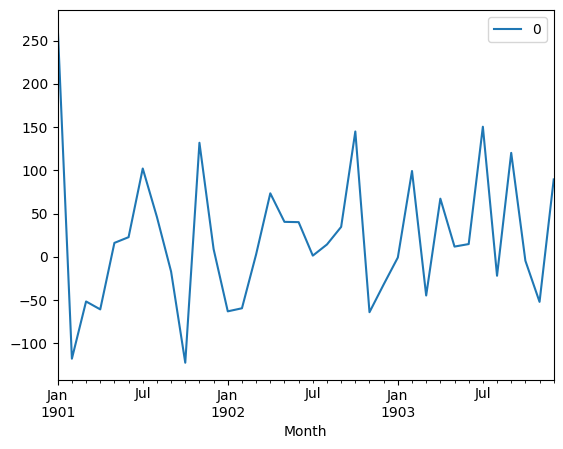

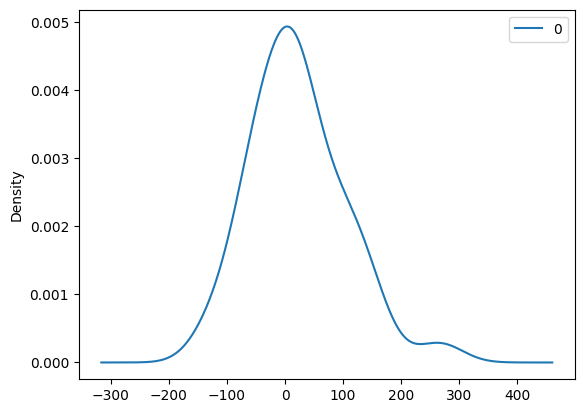

                0
count   36.000000
mean    21.936144
std     80.774430
min   -122.292030
25%    -35.040859
50%     13.147219
75%     68.848286
max    266.000000


In [ ]:
 # fit an ARIMA model and plot residual errors
from pandas import datetime
from pandas import read_csv
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('/content/sample_data/shampoo_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# fit model
model = ARIMA(series, order=(3,1,0))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

#Rolling Forecast ARIMA Model
The ARIMA model can be used to forecast future time steps.

We can use the predict() function on the ARIMAResults object to make predictions. It accepts the index of the time steps to make predictions as arguments. These indexes are relative to the start of the training dataset used to make predictions.

If we used 100 observations in the training dataset to fit the model, then the index of the next time step for making a prediction would be specified to the prediction function as start=101, end=101. This would return an array with one element containing the prediction.

We also would prefer the forecasted values to be in the original scale, in case we performed any differencing (d>0 when configuring the model). This can be specified by setting the typ argument to the value ‘levels’: typ=’levels’.

Alternately, we can avoid all of these specifications by using the forecast() function, which performs a one-step forecast using the model.

We can split the training dataset into train and test sets, use the train set to fit the model, and generate a prediction for each element on the test set.

A rolling forecast is required given the dependence on observations in prior time steps for differencing and the AR model. A crude way to perform this rolling forecast is to re-create the ARIMA model after each new observation is received.

<ipython-input-5-350991990d22>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-5-350991990d22>:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/sample_data/shampoo_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


predicted=343.272180, expected=342.300000
predicted=293.329674, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220221, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914944, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


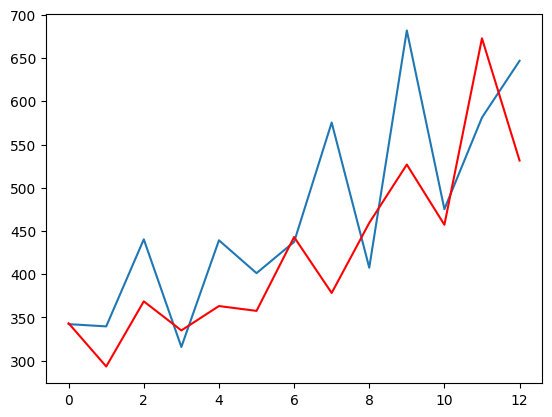

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')
series = read_csv('/content/sample_data/shampoo_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal


class MultivariateGaussianAnomalyDetector:
    def __init__(self, mean, cov):
        self.mean = mean
        self.cov = cov
        self.mv_normal = multivariate_normal(mean=mean, cov=cov)

    def detect_anomalies(self, data):
        """
        Detects anomalies in the given data using the multivariate Gaussian distribution.

        Args:
            data: A numpy array of shape (n_samples, n_features) containing the data to be analyzed.

        Returns:
            A numpy array of shape (n_samples,) containing the anomaly scores for each sample.
        """

        anomaly_scores = self.mv_normal.pdf(data)
        return anomaly_scores


# Example usage:

# Create a multivariate Gaussian distribution with mean [0, 0] and covariance matrix [[1, 0], [0, 1]].
mean = np.array([0, 0])
cov = np.array([[1, 0], [0, 1]])

# Create an anomaly detector.
anomaly_detector = MultivariateGaussianAnomalyDetector(mean, cov)

# Generate some data.
data = np.random.multivariate_normal(mean, cov, size=100)

# Detect anomalies.
anomaly_scores = anomaly_detector.detect_anomalies(data)

# Print the anomaly scores.
print(anomaly_scores)


[0.01194382 0.14213266 0.0993569  0.04394849 0.14335997 0.15290708
 0.10020313 0.12733735 0.05741571 0.1347516  0.02265589 0.0263172
 0.03429905 0.0795206  0.02011215 0.1509453  0.12342985 0.1296431
 0.10154526 0.10454828 0.0481908  0.03600239 0.02958099 0.02870167
 0.15896389 0.09307242 0.07870151 0.10073913 0.0309649  0.09706971
 0.01618843 0.10898268 0.10670505 0.11391415 0.06568218 0.10306248
 0.07247935 0.01712081 0.14669084 0.05129586 0.01261355 0.07318208
 0.05134266 0.10491469 0.01199094 0.10048055 0.14087629 0.01321914
 0.07615866 0.00498162 0.12084195 0.05036907 0.14941304 0.08786436
 0.03034089 0.1040799  0.03487633 0.11470724 0.04593246 0.07302368
 0.06758239 0.07015518 0.15516425 0.05386759 0.07938709 0.11299553
 0.02964798 0.04264517 0.08691117 0.06723697 0.0233703  0.11343528
 0.0115644  0.06877958 0.13888108 0.10655871 0.07053019 0.03316072
 0.08637543 0.02879236 0.01849967 0.15087536 0.03662295 0.15895134
 0.15034259 0.13476241 0.07721798 0.14274541 0.15431146 0.123306

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from numpy import genfromtxt

from sklearn.metrics import f1_score

In [ ]:
import scipy.stats as stats
multivariate_normal = stats.multivariate_normal


0.8750000000000001 9.036201327981216e-05


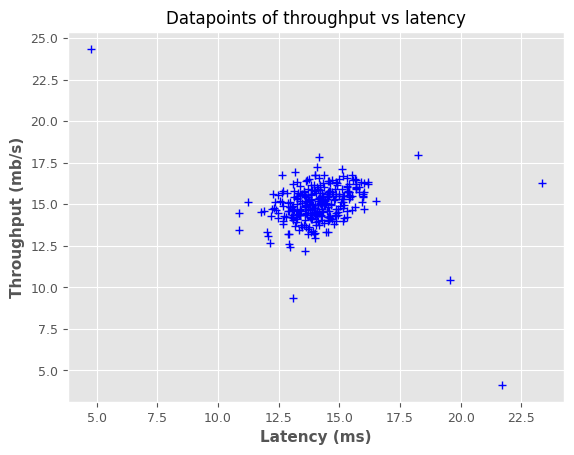

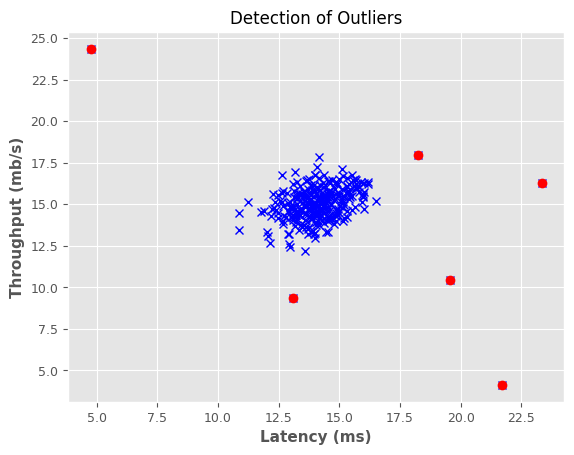

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import csv
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

#Let us explore our dataset. We first read them from our csv files
reader = csv.reader(open("train_server_data.csv", "r"), delimiter=",")
reader1 = csv.reader(open("crossval_server_data.csv", "r"), delimiter=",")
reader2 = csv.reader(open("test_server_data.csv", "r"), delimiter=",")

tr = list(reader)
cv = list(reader1)
ts = list(reader2)
train_data = np.array(tr[: :]).astype("float")
crossval_data = np.array(cv[: :]).astype("float")
test_data = np.array(ts[: :]).astype("float")


#n_dim = train_data[1]

#print('Number of datapoints in training set: %d' % n_training_samples)
#print('Number of dimensions/features: %d' % n_dim)


#print(train_data[1:5,:])

def read_dataset(filePath, delimiter=','):
    return genfromtxt(filePath, delimiter=delimiter)


def feature_normalize(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.std(dataset, axis=0)
    return (dataset - mu) / sigma


def estimate_gaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma


def multivariate_gaussian(dataset, mu, sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)


def select_threshold(probs, test_data):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs), max(probs), stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon)
        f = f1_score(test_data, predictions, average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon

    return best_f1, best_epsilon

mu, sigma = estimate_gaussian(train_data)
p = multivariate_gaussian(train_data,mu,sigma)

#selecting optimal value of epsilon using cross validation
p_cv = multivariate_gaussian(crossval_data,mu,sigma)
fscore, ep = select_threshold(p_cv,test_data)
print(fscore, ep)

#selecting outlier datapoints
outliers = np.asarray(np.where(p < ep))

plt.figure(1)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Datapoints of throughput vs latency')
plt.plot(train_data[:,0], train_data[:,1],'b+')
plt.show()

plt.figure(2)
plt.xlabel('Latency (ms)')
plt.ylabel('Throughput (mb/s)')
plt.title('Detection of Outliers')
plt.plot(train_data[:,0],train_data[:,1],'bx')
plt.plot(train_data[outliers,0],train_data[outliers,1],'ro')
plt.show()

In [ ]:
%matplotlib inline

import pandas as pd
import pprint
import sys
pprint.pprint(sys.path)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle
import datetime as dt

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']


In [ ]:
taxi_df = pd.read_csv("https://zenodo.org/record/4276428/files/STUMPY_Basics_Taxi.csv?download=1")
taxi_df['value'] = taxi_df['value'].astype(np.float64)
taxi_df['timestamp'] = pd.to_datetime(taxi_df['timestamp'])
taxi_df.head()


,timestamp,value
0,2014-10-01 00:00:00,12751.0
1,2014-10-01 00:30:00,8767.0
2,2014-10-01 01:00:00,7005.0
3,2014-10-01 01:30:00,5257.0
4,2014-10-01 02:00:00,4189.0


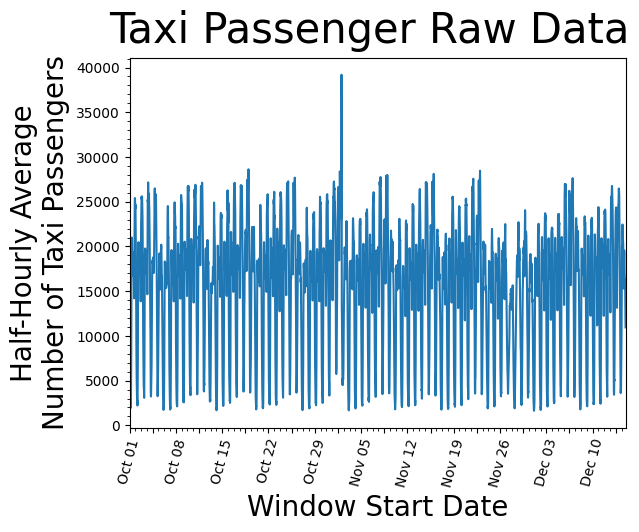

In [ ]:
# This code is going to be utilized to control the axis labeling of the plots
DAY_MULTIPLIER = 7  # Specify for the amount of days you want between each labeled x-axis tick

x_axis_labels = taxi_df[(taxi_df.timestamp.dt.hour==0)]['timestamp'].dt.strftime('%b %d').values[::DAY_MULTIPLIER]
x_axis_labels[1::2] = " "
x_axis_labels, DAY_MULTIPLIER

plt.suptitle('Taxi Passenger Raw Data', fontsize='30')
plt.xlabel('Window Start Date', fontsize ='20')
plt.ylabel('Half-Hourly Average\nNumber of Taxi Passengers', fontsize='20')
plt.plot(taxi_df['value'])

plt.xticks(np.arange(0, taxi_df['value'].shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.margins(x=0)
plt.show()

In [ ]:
!pip install stumpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 2.7 MB/s eta 0:00:00


In [ ]:
import stumpy

In [ ]:
m = 48
mp = stumpy.stump(taxi_df['value'], m=m)


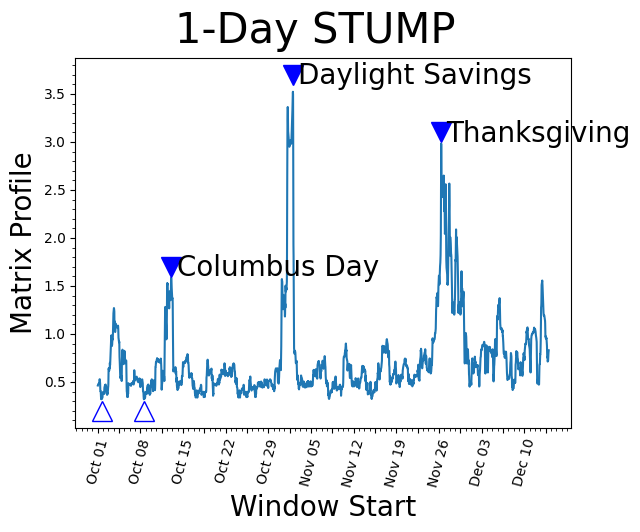

In [ ]:
plt.suptitle('1-Day STUMP', fontsize='30')
plt.xlabel('Window Start', fontsize ='20')
plt.ylabel('Matrix Profile', fontsize='20')
plt.plot(mp[:, 0])

plt.plot(575, 1.7, marker="v", markersize=15, color='b')
plt.text(620, 1.6, 'Columbus Day', color="black", fontsize=20)
plt.plot(1535, 3.7, marker="v", markersize=15, color='b')
plt.text(1580, 3.6, 'Daylight Savings', color="black", fontsize=20)
plt.plot(2700, 3.1, marker="v", markersize=15, color='b')
plt.text(2745, 3.0, 'Thanksgiving', color="black", fontsize=20)
plt.plot(30, .2, marker="^", markersize=15, color='b', fillstyle='none')
plt.plot(363, .2, marker="^", markersize=15, color='b', fillstyle='none')
plt.xticks(np.arange(0, 3553, (m*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.minorticks_on()
plt.show()

## Lowest Values
The lowest values (open triangles) are considered a motif since they represent the pair of nearest neighbor subsequences with the smallest z-normalized Euclidean distance. Interestingly, the two lowest data points are exactly 7 days apart, which suggests that, in this dataset, there may be a periodicity of seven days in addition to the more obvious periodicity of one day.

## Highest Values
So what about the highest matrix profile values (filled triangles)? The subsequences that have the highest (local) values really emphasizes their uniqueness. We found that the top three peaks happened to correspond exactly with the timing of Columbus Day, Daylight Saving Time, and Thanksgiving, respectively.

# Different Window Sizes
As we had mentioned above, stump should be robust to the choice of the window size parameter, m. Below, we demonstrate how manipulating the window size can have little impact on your resulting matrix profile by running stump with varying windows sizes.

In [ ]:
days_dict ={
  "Half-Day": 24,
  "1-Day": 48,
  "2-Days": 96,
  "5-Days": 240,
  "7-Days": 336,
}

days_df = pd.DataFrame.from_dict(days_dict, orient='index', columns=['m'])
days_df.head()

,m
Half-Day,24
1-Day,48
2-Days,96
5-Days,240
7-Days,336


We purposely chose spans of time that correspond to reasonably intuitive day-lengths that could be chosen by a human.


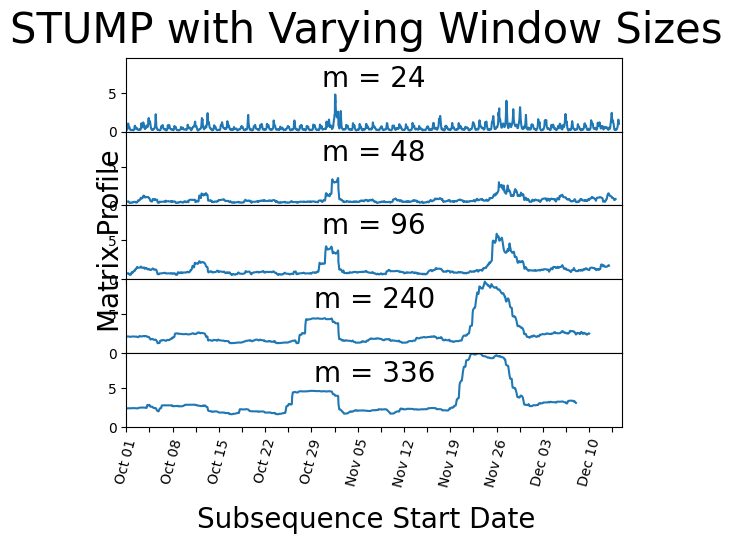

In [ ]:
fig, axs = plt.subplots(5, sharex=True, gridspec_kw={'hspace': 0})
fig.text(0.5, -0.1, 'Subsequence Start Date', ha='center', fontsize='20')
fig.text(0.08, 0.5, 'Matrix Profile', va='center', rotation='vertical', fontsize='20')
for i, varying_m in enumerate(days_df['m'].values):
    mp = stumpy.stump(taxi_df['value'], varying_m)
    axs[i].plot(mp[:, 0])
    axs[i].set_ylim(0,9.5)
    axs[i].set_xlim(0,3600)
    title = f"m = {varying_m}"
    axs[i].set_title(title, fontsize=20, y=.5)
plt.xticks(np.arange(0, taxi_df.shape[0], (48*DAY_MULTIPLIER)/2), x_axis_labels)
plt.xticks(rotation=75)
plt.suptitle('STUMP with Varying Window Sizes', fontsize='30')
plt.show()


We can see that even with varying window sizes, our peaks stay prominent. But it looks as if all the non-peak values are converging towards each other. This is why having a knowledge of the data-context is important prior to running stump, as it is helpful to have a window size that may capture a repeating pattern or anomaly within the dataset.